In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect


In [4]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///Resouces/hawaii.sqlite")
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# test using demographics data then erase
engine2 = create_engine("sqlite:///Resources/demographics.sqlite")
# reflect an existing database into a new model
Base2 = automap_base()

# reflect the tables
Base2.prepare(engine2, reflect=True)

# Create the inspector and connect it to the engine
inspector2 = inspect(engine2)

# Collect the names of tables within the database
inspector2.get_table_names()


[]

In [6]:
# test using demographics data
# Using the inspector to print the column names within the 'Salaries' table and its types
columns = inspector2.get_columns('demographics')
for column in columns:
    print(column["name"], column["type"])
    

In [7]:
# test using demographics data
# reflect an existing database into a new model
Base2 = automap_base()

# reflect the tables
Base2.prepare(engine2, reflect=True)

# Print all of the classes mapped to the Base
print(Base2.classes.keys())

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
print('tables inside of our hawaii.sqlite')
print(inspector.get_table_names())
print('')

# let's see what's in those tables
print(' -- columns inside of measurement table')
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
print('')
    
print(' -- columns inside of station table')
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])    


[]
tables inside of our hawaii.sqlite
['measurement', 'station']

 -- columns inside of measurement table
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

 -- columns inside of station table
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [9]:
# View all of the classes that automap found
Base.classes.keys()



['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

print(' -- Let\'s see what we have we have in our measurement table' )
print(session.query(Measurement).statement)
print('')

print(' -- Now let\'s see what we have for dates')
dates = session.query(Measurement) 
for date in dates:
    print(date.date)
    

 -- Let's see what we have we have in our measurement table
SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs 
FROM measurement

 -- Now let's see what we have for dates
2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
20

2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-09
2015-05-10
2015-05-11
2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18
2015-05-19
2015-05-20
2015-05-21
2015-05-22
2015-05-23
2015-05-24
2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30
2015-05-31
2015-06-01
2015-06-02
2015-06-03
2015-06-04
2015-06-05
2015-06-06
2015-06-07
2015-06-08
2015-06-09
2015-06-10
2015-06-11
2015-06-12
2015-06-13
2015-06-14
2015-06-15
2015-06-16
2015-06-17
2015-06-18
2015-06-19
2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25
2015-06-26
2015-06-27
2015-06-28
2015-06-29
2015-06-30
2015-07-01
2015-07-02
2015-07-03
2015-07-04
2015-07-05
2015-07-06
2015-07-07
2015-07-08
2015-07-09
2015-07-10
2015-07-11
2015-07-12
2015-07-13
2015-07-14
2015-07-15
2015-07-16
2015-07-17
2015-07-18
2015-07-19
2015-07-20
2015-07-21
2015-07-22
2015-07-23
2015-07-24
2015-07-25
2015-07-26
2015-07-27
2015-07-28
2015-07-29
2015-07-30
2015-07-31
2015-08-01
2015-08-02

2011-11-12
2011-11-13
2011-11-14
2011-11-15
2011-11-16
2011-11-17
2011-11-18
2011-11-19
2011-11-20
2011-11-21
2011-11-22
2011-11-23
2011-11-24
2011-11-25
2011-11-26
2011-11-27
2011-11-28
2011-11-29
2011-11-30
2011-12-01
2011-12-02
2011-12-03
2011-12-04
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-10
2011-12-11
2011-12-12
2011-12-13
2011-12-14
2011-12-15
2011-12-16
2011-12-17
2011-12-18
2011-12-19
2011-12-20
2011-12-21
2011-12-22
2011-12-23
2011-12-24
2011-12-25
2011-12-26
2011-12-27
2011-12-28
2011-12-29
2011-12-30
2011-12-31
2012-01-01
2012-01-02
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-07
2012-01-08
2012-01-09
2012-01-10
2012-01-11
2012-01-12
2012-01-13
2012-01-14
2012-01-15
2012-01-16
2012-01-17
2012-01-19
2012-01-20
2012-01-21
2012-01-22
2012-01-23
2012-01-24
2012-01-25
2012-01-26
2012-01-27
2012-01-28
2012-01-29
2012-01-30
2012-01-31
2012-02-01
2012-02-02
2012-02-03
2012-02-04
2012-02-05
2012-02-06
2012-02-07
2012-02-08
2012-02-09
2012-02-10
2012-02-11

2017-06-14
2017-06-15
2017-06-16
2017-06-17
2017-06-18
2017-06-19
2017-06-20
2017-06-21
2017-06-22
2017-06-23
2017-06-24
2017-06-25
2017-06-26
2017-06-27
2017-06-28
2017-06-29
2017-06-30
2017-07-01
2017-07-02
2017-07-03
2017-07-04
2017-07-05
2017-07-06
2017-07-07
2017-07-08
2017-07-09
2017-07-10
2017-07-11
2017-07-12
2017-07-13
2017-07-14
2017-07-15
2017-07-16
2017-07-17
2017-07-18
2017-07-19
2017-07-20
2017-07-21
2017-07-22
2017-07-23
2017-07-24
2017-07-25
2017-07-26
2017-07-27
2017-07-28
2017-07-29
2017-07-30
2017-07-31
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-08
2010-03-09
2010-03-10
2010-03-11
2010-03-12
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-19
2010-03-20
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-25
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-04
2010-04-05
2010-04-06
2010-04-07
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-14
2010-04-15
2010-04-16

2016-10-28
2016-10-29
2016-10-30
2016-10-31
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-05
2016-11-06
2016-11-07
2016-11-08
2016-11-09
2016-11-10
2016-11-11
2016-11-12
2016-11-13
2016-11-14
2016-11-15
2016-11-16
2016-11-17
2016-11-22
2016-11-25
2016-11-26
2016-11-27
2016-11-28
2016-11-29
2016-11-30
2016-12-01
2016-12-02
2016-12-03
2016-12-04
2016-12-05
2016-12-07
2016-12-08
2016-12-09
2016-12-10
2016-12-12
2016-12-13
2016-12-14
2016-12-15
2016-12-16
2016-12-17
2016-12-18
2016-12-19
2016-12-20
2016-12-21
2016-12-22
2016-12-23
2016-12-24
2016-12-26
2016-12-27
2016-12-28
2016-12-29
2016-12-30
2016-12-31
2017-01-01
2017-01-02
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-01-07
2017-01-08
2017-01-09
2017-01-10
2017-01-11
2017-01-13
2017-01-14
2017-01-16
2017-01-17
2017-01-18
2017-01-19
2017-01-20
2017-01-21
2017-01-23
2017-01-25
2017-01-26
2017-01-27
2017-01-28
2017-01-30
2017-01-31
2017-02-01
2017-02-02
2017-02-03
2017-02-05
2017-02-06
2017-02-07
2017-02-08
2017-02-09
2017-02-10

2012-04-02
2012-04-04
2012-04-05
2012-04-09
2012-04-16
2012-05-02
2012-05-09
2012-05-17
2012-05-18
2012-05-22
2012-05-24
2012-05-25
2012-05-27
2012-05-28
2012-06-01
2012-06-14
2012-06-21
2012-06-26
2012-06-29
2012-07-02
2012-07-20
2012-07-22
2012-07-23
2012-07-24
2012-07-25
2012-07-30
2012-07-31
2012-08-01
2012-08-03
2012-08-06
2012-08-24
2012-09-14
2012-09-17
2012-09-21
2012-09-24
2012-10-05
2012-10-08
2012-10-10
2012-10-11
2012-10-12
2012-10-15
2012-10-16
2012-10-17
2012-10-18
2012-10-22
2012-11-01
2012-11-08
2012-11-13
2012-11-15
2012-11-16
2012-11-20
2012-11-26
2012-11-27
2012-12-03
2012-12-06
2013-01-10
2013-01-14
2013-01-23
2013-01-24
2013-01-25
2013-02-01
2013-02-02
2013-02-06
2013-02-07
2013-02-08
2013-02-14
2013-02-15
2013-02-20
2013-02-22
2013-02-25
2013-02-27
2013-04-03
2013-04-05
2013-04-08
2013-04-11
2013-04-15
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-12
2013-08-14
2013-08-19
2013-08-21
2013-08-22
2013-08-23
2013-08-27
2013-08-29
2013-08-30
2013-09-01

2015-04-07
2015-04-08
2015-04-09
2015-04-11
2015-04-12
2015-04-13
2015-04-14
2015-04-15
2015-04-16
2015-04-17
2015-04-18
2015-04-19
2015-04-20
2015-04-21
2015-04-22
2015-04-23
2015-04-24
2015-04-25
2015-04-26
2015-04-27
2015-04-29
2015-04-30
2015-05-01
2015-05-02
2015-05-03
2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-09
2015-05-10
2015-05-11
2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18
2015-05-19
2015-05-20
2015-05-21
2015-05-22
2015-05-23
2015-05-24
2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30
2015-05-31
2015-06-01
2015-06-02
2015-06-03
2015-06-04
2015-06-05
2015-06-06
2015-06-07
2015-06-08
2015-06-09
2015-06-10
2015-06-11
2015-06-12
2015-06-13
2015-06-14
2015-06-15
2015-06-16
2015-06-17
2015-06-18
2015-06-19
2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25
2015-06-26
2015-06-27
2015-06-29
2015-06-30
2015-07-01
2015-07-02
2015-07-06
2015-07-07
2015-07-08
2015-07-09
2015-07-10
2015-07-11
2015-07-12

2013-04-16
2013-04-17
2013-04-18
2013-04-19
2013-04-20
2013-04-21
2013-04-22
2013-04-23
2013-04-24
2013-04-25
2013-04-26
2013-04-27
2013-04-28
2013-04-29
2013-04-30
2013-05-01
2013-05-02
2013-05-03
2013-05-04
2013-05-05
2013-05-06
2013-05-07
2013-05-08
2013-05-09
2013-05-10
2013-05-11
2013-05-12
2013-05-13
2013-05-14
2013-05-15
2013-05-16
2013-05-17
2013-05-18
2013-05-19
2013-05-20
2013-05-21
2013-05-22
2013-05-23
2013-05-24
2013-05-25
2013-05-26
2013-05-27
2013-05-28
2013-05-29
2013-05-30
2013-05-31
2013-06-01
2013-06-02
2013-06-03
2013-06-04
2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
2013-06-10
2013-06-11
2013-06-12
2013-06-13
2013-06-14
2013-06-15
2013-06-16
2013-06-17
2013-06-18
2013-06-19
2013-06-20
2013-06-21
2013-06-22
2013-06-23
2013-06-24
2013-06-25
2013-06-26
2013-06-27
2013-06-28
2013-06-29
2013-06-30
2013-07-01
2013-07-02
2013-07-03
2013-07-04
2013-07-05
2013-07-06
2013-07-07
2013-07-08
2013-07-09
2013-07-10
2013-07-11
2013-07-12
2013-07-13
2013-07-14
2013-07-15

2011-03-15
2011-03-16
2011-03-18
2011-03-19
2011-03-20
2011-03-21
2011-03-22
2011-03-23
2011-03-24
2011-03-25
2011-03-26
2011-03-27
2011-03-28
2011-03-29
2011-03-30
2011-03-31
2011-04-01
2011-04-02
2011-04-03
2011-04-04
2011-04-05
2011-04-06
2011-04-07
2011-04-08
2011-04-09
2011-04-10
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-22
2011-04-23
2011-04-24
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-04-30
2011-05-01
2011-05-02
2011-05-03
2011-05-04
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14

2011-04-06
2011-04-07
2011-04-08
2011-04-09
2011-04-10
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-21
2011-04-22
2011-04-23
2011-04-24
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-05-01
2011-05-02
2011-05-03
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-08
2011-07-10

2017-02-25
2017-02-26
2017-02-27
2017-02-28
2017-03-01
2017-03-02
2017-03-03
2017-03-04
2017-03-05
2017-03-06
2017-03-07
2017-03-08
2017-03-09
2017-03-10
2017-03-11
2017-03-13
2017-03-14
2017-03-15
2017-03-16
2017-03-18
2017-03-19
2017-03-20
2017-03-21
2017-03-22
2017-03-23
2017-03-24
2017-03-25
2017-03-26
2017-03-27
2017-03-28
2017-03-29
2017-03-31
2017-04-01
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06
2017-04-08
2017-04-09
2017-04-10
2017-04-11
2017-04-12
2017-04-13
2017-04-14
2017-04-15
2017-04-16
2017-04-17
2017-04-18
2017-04-19
2017-04-20
2017-04-21
2017-04-22
2017-04-23
2017-04-24
2017-04-25
2017-04-26
2017-04-27
2017-04-28
2017-04-29
2017-04-30
2017-05-01
2017-05-02
2017-05-04
2017-05-05
2017-05-06
2017-05-07
2017-05-08
2017-05-09
2017-05-10
2017-05-11
2017-05-12
2017-05-13
2017-05-14
2017-05-15
2017-05-16
2017-05-17
2017-05-18
2017-05-20
2017-05-21
2017-05-22
2017-05-23
2017-05-24
2017-05-25
2017-05-26
2017-05-27
2017-05-28
2017-05-30
2017-06-01
2017-06-03
2017-06-04

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs 
#FROM measurement where measurement.date > '2016-08-31'

print(' -- our last date in measurement')
last_date = pd.read_sql_query("SELECT MAX(date) FROM measurement", engine)
print(last_date)

# Calculate the date one year from the last date in data set.

#select date from measurement where date like '2017-%' or '2016-%'
print(' -- get twelve months')
twelve_months = pd.read_sql_query("select distinct date from measurement where (date like '2017%')\
                                  or (date like '2016-09%')\
                                  or (date like '2016-10%')\
                                  or (date like '2016-11%')\
                                  or (date like '2016-12%')", engine)
print(twelve_months)
print('')


# Perform a query to retrieve the data and precipitation scores
print(' -- get twelve months with precipitation data')
twelve_months = pd.read_sql_query("select date, prcp from measurement where (date like '2017%')\
                                  or (date like '2016-09%')\
                                  or (date like '2016-10%')\
                                  or (date like '2016-11%')\
                                  or (date like '2016-12%')", engine)
print(twelve_months)
print('')
# group by date and average prcp

print(' -- drop rows with null values')
twelve_months.dropna(axis = 0, how = 'any', inplace=True)
print(twelve_months)
print('')
# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date




 -- our last date in measurement
    MAX(date)
0  2017-08-23
 -- get twelve months
           date
0    2016-09-01
1    2016-09-02
2    2016-09-03
3    2016-09-04
4    2016-09-05
..          ...
352  2017-05-09
353  2017-05-26
354  2017-07-19
355  2017-08-16
356  2017-08-17

[357 rows x 1 columns]

 -- get twelve months
            date  prcp
0     2016-09-01  0.00
1     2016-09-02  0.00
2     2016-09-03  0.00
3     2016-09-04  0.03
4     2016-09-05   NaN
...          ...   ...
1498  2017-08-19  0.09
1499  2017-08-20   NaN
1500  2017-08-21  0.56
1501  2017-08-22  0.50
1502  2017-08-23  0.45

[1503 rows x 2 columns]

 -- drop rows with null values
            date  prcp
0     2016-09-01  0.00
1     2016-09-02  0.00
2     2016-09-03  0.00
3     2016-09-04  0.03
6     2016-09-07  0.05
...          ...   ...
1496  2017-08-17  0.13
1498  2017-08-19  0.09
1500  2017-08-21  0.56
1501  2017-08-22  0.50
1502  2017-08-23  0.45

[1332 rows x 2 columns]



In [38]:
print('------')
print('  Something we\'ve learned by looking at this data is there must ')
print('  be multiple measurements for individual dates, because otherwise we')
print('  would have no more than 365 rows of data, not the 1332 reported above.')
print('  So now what, Little Billy?')
print('  We could just ditch all but the first row of any duplicates, which seems rude.')
print('  We don\'t know why we have duplicate readings and maybe there is a good reason for')
print('  for multiples, so we are going to group by date and then average the precipitation')
print('  data when there is multiple readings and call it good.')
print('------')
print('')

print(' --> precip_avg_df --> 357 rows.  less than 365 because we dropped nulls')
precip_avg = twelve_months.groupby(['date'])['prcp'].mean()
precip_avg_df = pd.DataFrame(precip_avg)
precip_avg_df

------
  Something we've learned by looking at this data is there must 
  be multiple measurements for individual dates, because otherwise we
  would have no more than 365 rows of data, not the 1332 reported above.
  So now what, Little Billy?
  We could just ditch all but the first row of any duplicates, which seems rude.
  We don't know why we have duplicate readings and maybe there is a good reason for
  for multiples, so we are going to group by date and then average the precipitation
  data when there is multiple readings and call it good.
------

 --> precip_avg_df --> 357 rows.  less than 365 because we dropped nulls


,prcp
date,
2016-09-01,0.010000
2016-09-02,0.050000
2016-09-03,0.254000
2016-09-04,0.337500
2016-09-05,0.085000
...,...
2017-08-19,0.045000
2017-08-20,0.005000
2017-08-21,0.193333


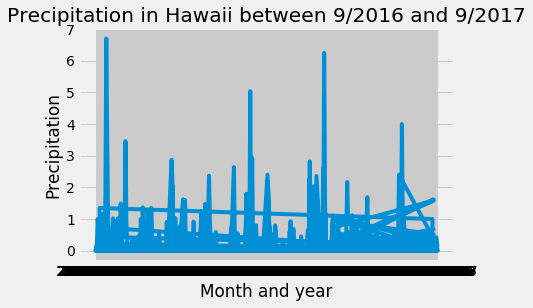

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(twelve_months['date'], twelve_months['prcp'])
plt.xlabel("Month and year")
plt.ylabel("Precipitation")
plt.title('Precipitation in Hawaii between 9/2016 and 9/2017')
plt.show()

In [15]:
print(' -- That is not very useful, so how about we sum the percipitation of each month')
print(' -- and bar graph that data')
print('')
print(' -- first up...')
print(' -- split our raw date string into year, month and day')
print('')
split_data = twelve_months['date'].str.split("-")
data = split_data.to_list()
names = ['year', 'month', 'day']
new_df = pd.DataFrame(data, columns=names)
print(' -- new_df')
print(new_df)

new_df = new_df.merge(twelve_months, left_index=True, right_index=True)
print('')
print(' -- new_df now after merge')
print('')
print(new_df.head())
print('')

print(' -- months_sum')
print('')
months_sum = new_df.groupby(['month'])['prcp'].sum()
print(months_sum)

#months_sum.to_frame()
months_sum = pd.DataFrame(months_sum)
print('')
print(months_sum)
print(' -- and months_sum is now type...')
print(type(months_sum))


new_df.to_csv (r'new_df_dataframe.csv', header=True)


 -- That is not very useful, so how about we sum the percipitation of each month
 -- and bar graph that data

 -- first up...
 -- split our raw date string into year, month and day

 -- new_df
      year month day
0     2016    09  01
1     2016    09  02
2     2016    09  03
3     2016    09  04
4     2016    09  07
...    ...   ...  ..
1963  2017    08  17
1964  2017    08  19
1965  2017    08  21
1966  2017    08  22
1967  2017    08  23

[1968 rows x 3 columns]

 -- new_df now after merge

   year month day        date  prcp
0  2016    09  01  2016-09-01  0.00
1  2016    09  02  2016-09-02  0.00
2  2016    09  03  2016-09-03  0.00
3  2016    09  04  2016-09-04  0.03
6  2016    09  09  2016-09-07  0.05

 -- months_sum

month
01    10.64
02    16.21
03    43.23
04    32.13
05    24.93
06    31.50
07    21.14
08     4.21
09    31.00
10     6.32
11    28.77
12    19.32
Name: prcp, dtype: float64

        prcp
month       
01     10.64
02     16.21
03     43.23
04     32.13
05     24.93

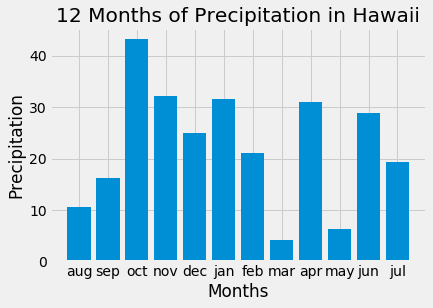


For this date range the driest months are march, may and august.


In [16]:
months = ['aug','sep','oct','nov','dec','jan', 'feb','mar','apr','may','jun','jul']
plt.bar(months, months_sum['prcp'])
plt.xlabel("Months")
plt.ylabel("Precipitation")
plt.title('12 Months of Precipitation in Hawaii')
plt.show()
print('')
print('For this date range the driest months are march, may and august.')



In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print('')
print(' -- Let us see what the precipitation data has to say')
print('')
twelve_months['prcp'].describe()


 -- Let us see what the precipitation data has to say



count    1968.000000
mean        0.171479
std         0.451817
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
print(' -- Let\'s see what we have we have in our Station class' )
print(session.query(Station).statement)
print('')

print(' -- let us peek into our station class')
station_data = pd.read_sql_query("SELECT * FROM station", engine)
print(station_data)
print('')

#select count(distinct station) from station

station_count = pd.read_sql_query("select count(distinct station) from station", engine)
print(station_count)
print('')

unique_stations= pd.read_sql_query("select distinct station from station", engine)
print(f"unique stations:")
print(unique_stations)
print('')




 -- Let's see what we have we have in our Station class
SELECT station.id, station.station, station.name, station.latitude, station.longitude, station.elevation 
FROM station

 -- let us peek into our station class
   id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US  21.27160   
1   2  USC00513117                    KANEOHE 838.1, HI US  21.42340   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130   
3   4  USC00517948                       PEARL CITY, HI US  21.39340   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920   
5   6  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556   
6   7  USC00519281                     WAIHEE 837.5, HI US  21.45167   
7   8  USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520   
8   9  USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310   

   longitude  elevation  
0 -157.81680        3.0  
1 -157.80150

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.




In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.



In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



# Close session

In [ ]:
# Close Session
session.close()

